<a href="https://colab.research.google.com/github/huggingface/deep-rl-class/blob/ThomasSimonini%2FMLAgents/notebooks/unit5/unit5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 5: An Introduction to ML-Agents



<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit7/thumbnail.png" alt="Thumbnail"/>

In this notebook, you'll learn about ML-Agents and you'll train two agents.

- The first one will learn to **shoot snowballs onto spawning targets**.
- The second need to press a button to spawn a pyramid, then navigate to the pyramid, knock it over, **and move to the gold brick at the top**. To do that, it will need to explore its environment, and we will use a technique called curiosity.

After that, you’ll be able **to watch your agents playing directly on your browser**.

For more information about the certification process, check this section 👉 https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process

⬇️ Here is an example of what **you will achieve at the end of this unit.** ⬇️


<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit7/pyramids.gif" alt="Pyramids"/>

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit7/snowballtarget.gif" alt="SnowballTarget"/>

### 🎮 Environments: 

- [Pyramids](https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Learning-Environment-Examples.md#pyramids)
- SnowballTarget

### 📚 RL-Library: 

- [ML-Agents (HuggingFace Experimental Version)](https://github.com/huggingface/ml-agents)

⚠ We're going to use an experimental version of ML-Agents were you can push to hub and load from hub Unity ML-Agents Models **you need to install the same version**

We're constantly trying to improve our tutorials, so **if you find some issues in this notebook**, please [open an issue on the GitHub Repo](https://github.com/huggingface/deep-rl-class/issues).

## Objectives of this notebook 🏆

At the end of the notebook, you will:

- Understand how works **ML-Agents**, the environment library.
- Be able to **train agents in Unity Environments**.


## This notebook is from the Deep Reinforcement Learning Course
<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/deep-rl-course-illustration.jpg" alt="Deep RL Course illustration"/>

In this free course, you will:

- 📖 Study Deep Reinforcement Learning in **theory and practice**.
- 🧑‍💻 Learn to **use famous Deep RL libraries** such as Stable Baselines3, RL Baselines3 Zoo, CleanRL and Sample Factory 2.0.
- 🤖 Train **agents in unique environments** 

And more check 📚 the syllabus 👉 https://huggingface.co/deep-rl-course/communication/publishing-schedule

Don’t forget to **<a href="http://eepurl.com/ic5ZUD">sign up to the course</a>** (we are collecting your email to be able to **send you the links when each Unit is published and give you information about the challenges and updates).**


The best way to keep in touch is to join our discord server to exchange with the community and with us 👉🏻 https://discord.gg/ydHrjt3WP5

## Prerequisites 🏗️
Before diving into the notebook, you need to:

🔲 📚 **Study [what is ML-Agents and how it works by reading Unit 5](https://huggingface.co/deep-rl-course/unit5/introduction)**  🤗  

# Let's train our agents 🚀

The ML-Agents integration on the Hub is **still experimental**, some features will be added in the future. 

But for now, **to validate this hands-on for the certification process, you just need to push your trained models to the Hub**. There’s no results to attain to validate this one. But if you want to get nice results you can try to attain:

- For `Pyramids` : Mean Reward = 1.75
- For `SnowballTarget` : Mean Reward = 15 or 30 targets hit in an episode.


## Clone the repository and install the dependencies 🔽
- We need to clone the repository, that **contains the experimental version of the library that allows you to push your trained agent to the Hub.**

In [ ]:
%%capture
# Clone the repository (can take 1min)
!git clone --depth 1 https://github.com/huggingface/ml-agents/ 

In [ ]:
%%capture
# Go inside the repository and install the package
%cd ml-agents
!pip3 install -e ./ml-agents-envs
!pip3 install -e ./ml-agents

## SnowballTarget ⛄

If you need a refresher on how this environments work check this section 👉
https://huggingface.co/deep-rl-course/unit5/snowball-target

### Download and move the environment zip file in `./training-envs-executables/linux/`
- Our environment executable is in a zip file.
- We need to download it and place it to `./training-envs-executables/linux/`
- We use a linux executable because we use colab, and colab machines OS is Ubuntu (linux)

In [ ]:
# Here, we create training-envs-executables and linux
!mkdir ./training-envs-executables
!mkdir ./training-envs-executables/linux

Download the file SnowballTarget.zip from https://drive.google.com/file/d/1YHHLjyj6gaZ3Gemx1hQgqrPgSS2ZhmB5 using `wget`. 

Check out the full solution to download large files from GDrive [here](https://bcrf.biochem.wisc.edu/2021/02/05/download-google-drive-files-using-wget/)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YHHLjyj6gaZ3Gemx1hQgqrPgSS2ZhmB5' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1YHHLjyj6gaZ3Gemx1hQgqrPgSS2ZhmB5" -O ./training-envs-executables/linux/SnowballTarget.zip && rm -rf /tmp/cookies.txt

**OR** Download directly to local machine and then drag and drop the file from local machine to `./training-envs-executables/linux`

In [ ]:
%%capture
!unzip -d ./training-envs-executables/linux/ ./training-envs-executables/linux/SnowballTarget.zip

Make sure your file is accessible 

In [ ]:
!chmod -R 755 ./training-envs-executables/linux/SnowballTarget

### Define the SnowballTarget config file
- In ML-Agents, you define the **training hyperparameters into config.yaml files.**

There are multiple hyperparameters, to know them better you should check for each the explanation with [the documentation](https://github.com/Unity-Technologies/ml-agents/blob/release_20_docs/docs/Training-Configuration-File.md)


So you need to create a `SnowballTarget.yaml` config file in ./content/ml-agents/config/ppo/

We'll give you here a first version of this config (to copy and paste into your `SnowballTarget.yaml file`), **but you should modify it**.

```
behaviors:
  SnowballTarget:
    trainer_type: ppo
    summary_freq: 10000
    keep_checkpoints: 10
    checkpoint_interval: 50000
    max_steps: 800000
    time_horizon: 64
    threaded: true
    hyperparameters:
      learning_rate: 0.0003
      learning_rate_schedule: linear
      batch_size: 128
      buffer_size: 2048
      beta: 0.005
      epsilon: 0.2
      lambd: 0.95
      num_epoch: 3
    network_settings:
      normalize: false
      hidden_units: 256
      num_layers: 2
      vis_encode_type: simple
    reward_signals:
      extrinsic:
        gamma: 0.99
        strength: 1.0
```

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit7/snowballfight_config1.png" alt="Config SnowballTarget"/>
<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit7/snowballfight_config2.png" alt="Config SnowballTarget"/>

As an experimentation, you should also try to modify some other hyperparameters, Unity provides a very [good documentation explaining each of them here](https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Training-Configuration-File.md).

Now that you've created the config file and understand what most of the hyperparameters does, we're ready to train our agent 🔥.

### Train the agent

To train our agent, we just need to **launch mlagents-learn and select the executable containing the environment.**

We define four parameters:

1. `mlagents-learn <config>`: the path where the hyperparameter config file is.
2. `--env`: where the environment executable is.
3. `--run_id`: the name you want to give to your training run id.
4. `--no-graphics`: to not launch the visualization during the training.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit7/mlagentslearn.png" alt="MlAgents learn"/>

Train the model and use the `--resume` flag to continue training in case of interruption. 

> It will fail first time if and when you use `--resume`, try running the block again to bypass the error. 



The training will take 25 to 35min depending on your machine, go take a ☕️you deserve it 🤗.

In [ ]:
!mlagents-learn ./config/ppo/SnowballTarget.yaml --env=./training-envs-executables/linux/SnowballTarget --run-id="SnowballTarget1" --no-graphics

### Push the agent to the 🤗 Hub

- Now that we trained our agent, we’re **ready to push it to the Hub to be able to visualize it playing on your browser🔥.**

To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account to HF ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/create-token.jpg" alt="Create HF Token">

- Copy the token 
- Run the cell below and paste the token

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

Then, we simply need to run `mlagents-push-to-hf`.



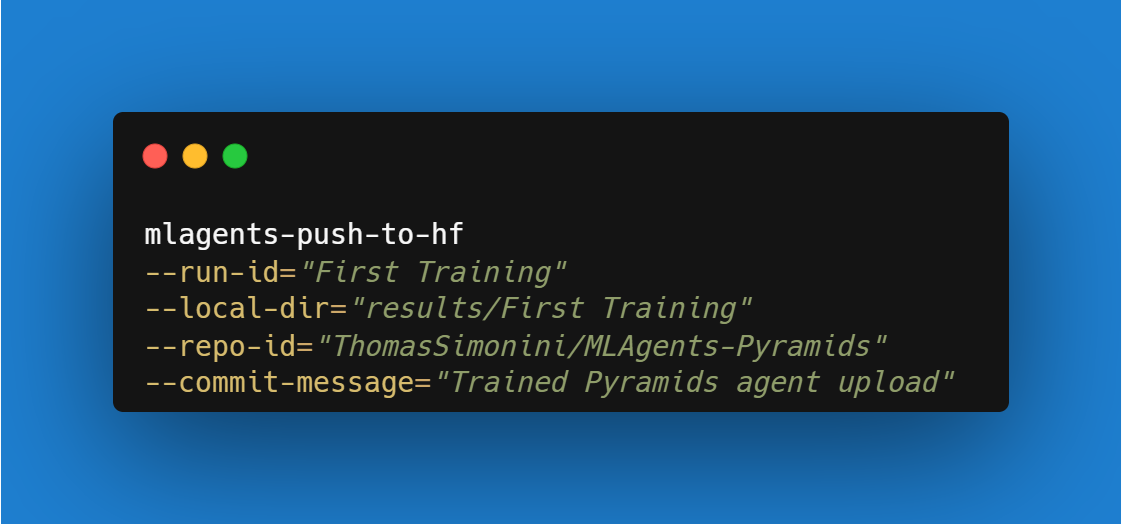

And we define 4 parameters:

1. `--run-id`: the name of the training run id.
2. `--local-dir`: where the agent was saved, it’s results/<run_id name>, so in my case results/First Training.
3. `--repo-id`: the name of the Hugging Face repo you want to create or update. It’s always <your huggingface username>/<the repo name>
If the repo does not exist **it will be created automatically**
4. `--commit-message`: since HF repos are git repository you need to define a commit message.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit7/mlagentspushtohub.png" alt="Push to Hub"/>

In [ ]:
!mlagents-push-to-hf  --run-id= # Add your run id  --local-dir= # Your local dir  --repo-id= # Your repo id  --commit-message= # Your commit message

Else, if everything worked you should have this at the end of the process(but with a different url 😆) :



```
Your model is pushed to the hub. You can view your model here: https://huggingface.co/ThomasSimonini/ppo-SnowballTarget
```

It’s the link to your model, it contains a model card that explains how to use it, your Tensorboard and your config file. **What’s awesome is that it’s a git repository, that means you can have different commits, update your repository with a new push etc.**

But now comes the best: **being able to visualize your agent online 👀.**

### Watch your agent playing 👀

For this step it’s simple:

1. Remember your repo-id

2. Go here: https://singularite.itch.io/snowballtarget

3. Launch the game and put it in full screen by clicking on the bottom right button

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit7/snowballtarget_load.png" alt="Snowballtarget load"/>

1. In step 1, choose your model repository which is the model id (in my case ThomasSimonini/ppo-SnowballTarget).

2. In step 2, **choose what model you want to replay**:
  - I have multiple one, since we saved a model every 500000 timesteps. 
  - But if I want the more recent I choose `SnowballTarget.onnx`

👉 What’s nice **is to try with different models step to see the improvement of the agent.**

And don't hesitate to share the best score your agent gets on discord in #rl-i-made-this channel 🔥

Let's now try a harder environment called Pyramids...

## Pyramids 🏆

### Download and move the environment zip file in `./training-envs-executables/linux/`
- Our environment executable is in a zip file.
- We need to download it and place it to `./training-envs-executables/linux/`
- We use a linux executable because we use colab, and colab machines OS is Ubuntu (linux)

Download the file Pyramids.zip from https://drive.google.com/uc?export=download&id=1UiFNdKlsH0NTu32xV-giYUEVKV4-vc7H using `wget`. Check out the full solution to download large files from GDrive [here](https://bcrf.biochem.wisc.edu/2021/02/05/download-google-drive-files-using-wget/)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UiFNdKlsH0NTu32xV-giYUEVKV4-vc7H' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1UiFNdKlsH0NTu32xV-giYUEVKV4-vc7H" -O ./training-envs-executables/linux/Pyramids.zip && rm -rf /tmp/cookies.txt

**OR** Download directly to local machine and then drag and drop the file from local machine to `./training-envs-executables/linux`

Wait for the upload to finish and then run the command below. 

image.png

In [ ]:
%%capture
!unzip -d ./training-envs-executables/linux/ ./training-envs-executables/linux/Pyramids.zip

Make sure your file is accessible 

In [ ]:
!chmod -R 755 ./training-envs-executables/linux/Pyramids/Pyramids

###  Modify the PyramidsRND config file
- Contrary to the first environment which was a custom one, **Pyramids was made by the Unity team**.
- So the PyramidsRND config file already exists and is in ./content/ml-agents/config/ppo/PyramidsRND.yaml
- You might asked why "RND" in PyramidsRND. RND stands for *random network distillation* it's a way to generate curiosity rewards. If you want to know more on that we wrote an article explaning this technique: https://medium.com/data-from-the-trenches/curiosity-driven-learning-through-random-network-distillation-488ffd8e5938

For this training, we’ll modify one thing:
- The total training steps hyperparameter is too high since we can hit the benchmark (mean reward = 1.75) in only 1M training steps.
👉 To do that, we go to config/ppo/PyramidsRND.yaml,**and modify these to max_steps to 1000000.**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit7/pyramids-config.png" alt="Pyramids config"/>

As an experimentation, you should also try to modify some other hyperparameters, Unity provides a very [good documentation explaining each of them here](https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Training-Configuration-File.md).

We’re now ready to train our agent 🔥.

### Train the agent

The training will take 30 to 45min depending on your machine, go take a ☕️you deserve it 🤗.

In [ ]:
!mlagents-learn ./config/ppo/PyramidsRND.yaml --env=./trained-envs-executables/linux/Pyramids/Pyramids --run-id="Pyramids Training" --no-graphics

### Push the agent to the 🤗 Hub

- Now that we trained our agent, we’re **ready to push it to the Hub to be able to visualize it playing on your browser🔥.**

In [ ]:
!mlagents-push-to-hf  --run-id= # Add your run id  --local-dir= # Your local dir  --repo-id= # Your repo id  --commit-message= # Your commit message

### Watch your agent playing 👀

The temporary link for Pyramids demo is: https://singularite.itch.io/pyramids

### 🎁 Bonus: Why not train on another environment?
Now that you know how to train an agent using MLAgents, **why not try another environment?** 

MLAgents provides 18 different and we’re building some custom ones. The best way to learn is to try things of your own, have fun.



![cover](https://miro.medium.com/max/1400/0*xERdThTRRM2k_U9f.png)

You have the full list of the one currently available on Hugging Face here 👉 https://github.com/huggingface/ml-agents#the-environments

For the demos to visualize your agent, the temporary link is: https://singularite.itch.io

We have: 
- [Worm](https://singularite.itch.io/worm), where you teach a **worm to crawl**.
- [Walker](https://singularite.itch.io/walker): teach an agent **to walk towards a goal**.

If you want new demos to be added, please open an issue: https://github.com/huggingface/deep-rl-class

That’s all for today. Congrats on finishing this tutorial!

The best way to learn is to practice and try stuff. Why not try another environment? ML-Agents has 18 different environments, but you can also create your own? Check the documentation and have fun!

See you on Unit 6 🔥,

## Keep Learning, Stay  awesome 🤗